### Riya Addula	
### Elise Insall	
### Makaila Monauni

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.stats as stats

In [ ]:
test_data = pd.read_csv("cattle_data_test.csv")
print(test_data.shape)
test_data.head(10)

(40000, 35)


,Cattle_ID,Breed,Climate_Zone,Management_System,Age_Months,Weight_kg,Parity,Lactation_Stage,Days_in_Milk,Feed_Type,...,IBR_Vaccine,BVD_Vaccine,Rabies_Vaccine,Previous_Week_Avg_Yield,Body_Condition_Score,Milking_Interval_hrs,Date,Farm_ID,Feed_Quantity_lb,Mastitis
0,1,Holstein,Temperate,Semi_Intensive,42,420.9,3,Early,302,Mixed_Feed,...,1,0,0,6.76,3.5,12,2022-11-29,FARM_0740,28.4445,0
1,2,Holstein,Temperate,Extensive,112,466.6,5,Late,103,Green_Fodder,...,0,0,1,9.87,2.0,12,2022-10-11,FARM_0607,15.2145,0
2,3,Jersey,Temperate,Semi_Intensive,57,496.5,1,Early,342,Crop_Residues,...,0,1,1,4.27,3.5,12,2024-03-21,FARM_0706,37.4850,0
3,4,Holstein,Subtropical,Extensive,63,617.5,6,Early,170,Concentrates,...,0,1,0,0.00,2.5,12,2023-12-25,FARM_0673,23.1525,0
4,5,Guernsey,Tropical,Semi_Intensive,34,413.9,6,Early,246,Dry_Fodder,...,0,1,1,1.91,3.5,12,2023-05-18,FARM_0112,35.5005,0
5,6,Holstein,Mediterranean,Mixed,35,593.1,4,Early,283,Pasture_Grass,...,0,0,1,12.26,3.5,6,2022-11-16,FARM_0861,27.5625,0
6,7,Jersey,Continental,Pastoral,143,566.5,2,Early,96,Dry_Fodder,...,1,1,1,11.55,3.0,12,2022-04-28,FARM_0736,NaN,1
7,8,Guernsey,Subtropical,Mixed,111,621.5,1,Early,317,Crop_Residues,...,1,1,0,0.00,4.5,12,2022-02-17,FARM_0804,33.2955,0
8,9,Holstein,Mediterranean,Intensive,59,634.8,2,Mid,46,Dry_Fodder,...,1,0,0,3.96,3.5,12,2022-05-12,FARM_0025,22.7115,0
9,10,Brown Swiss,Temperate,Mixed,110,258.1,2,Mid,325,Silage,...,1,1,0,5.97,3.0,12,2023-03-03,FARM_0987,29.3265,0


In [ ]:
train_data = pd.read_csv("cattle_data_train.csv")
print(train_data.shape)
train_data.head(10)

(210000, 36)


,Cattle_ID,Breed,Climate_Zone,Management_System,Age_Months,Weight_kg,Parity,Lactation_Stage,Days_in_Milk,Feed_Type,...,BVD_Vaccine,Rabies_Vaccine,Previous_Week_Avg_Yield,Body_Condition_Score,Milking_Interval_hrs,Date,Farm_ID,Feed_Quantity_lb,Mastitis,Milk_Yield_L
0,CATTLE_133713,Holstein,Tropical,Intensive,114,544.8,4,Mid,62,Concentrates,...,0,1,6.31,3.0,12,2024-01-15,FARM_0301,36.8235,1,12.192634
1,CATTLE_027003,Holstein,Arid,Mixed,136,298.9,4,Mid,213,Crop_Residues,...,0,0,17.16,4.0,12,2023-10-31,FARM_0219,NaN,0,14.717031
2,CATTLE_122459,Holstein,Tropical,Semi_Intensive,64,336.6,4,Late,16,Hay,...,1,0,4.07,3.5,12,2024-05-20,FARM_0802,16.0965,0,14.006142
3,CATTLE_213419,Jersey,Mediterranean,Intensive,58,370.5,1,Early,339,Crop_Residues,...,0,0,10.23,3.0,24,2024-07-22,FARM_0034,40.7925,0,24.324325
4,CATTLE_106260,Guernsey,Subtropical,Intensive,84,641.5,6,Early,125,Mixed_Feed,...,1,1,20.68,3.0,12,2023-01-03,FARM_0695,33.7365,1,12.023074
5,CATTLE_090774,Jersey,Continental,Pastoral,50,464.3,5,Late,174,Hay,...,1,0,7.48,3.5,12,2022-10-01,FARM_0766,31.5315,0,20.736971
6,CATTLE_029380,Guernsey,Mediterranean,Pastoral,67,422.3,6,Late,263,Silage,...,1,0,3.58,3.5,8,2024-03-21,FARM_0114,23.1525,0,12.722306
7,CATTLE_081978,Guernsey,Tropical,Pastoral,71,582.7,3,Mid,53,Dry_Fodder,...,0,1,5.14,3.0,12,2024-06-01,FARM_0120,24.4755,0,13.440506
8,CATTLE_167633,Brown Swiss,Arid,Pastoral,98,540.3,6,Early,34,Hay,...,0,1,11.04,4.0,12,2024-09-18,FARM_0303,31.3110,0,14.938699
9,CATTLE_021443,Holstein,Tropical,Mixed,40,382.9,6,Mid,352,Pasture_Grass,...,1,0,2.48,3.5,12,2023-04-24,FARM_0584,23.8140,1,7.961243


## Data Exploration

In [ ]:
train_data.info()
''' There are 3 categories with null values: Feed_Quantity_kg, Housing_Score, Feed_Quantity_lb'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Cattle_ID                210000 non-null  object 
 1   Breed                    210000 non-null  object 
 2   Climate_Zone             210000 non-null  object 
 3   Management_System        210000 non-null  object 
 4   Age_Months               210000 non-null  int64  
 5   Weight_kg                210000 non-null  float64
 6   Parity                   210000 non-null  int64  
 7   Lactation_Stage          210000 non-null  object 
 8   Days_in_Milk             210000 non-null  int64  
 9   Feed_Type                210000 non-null  object 
 10  Feed_Quantity_kg         199519 non-null  float64
 11  Feeding_Frequency        210000 non-null  int64  
 12  Water_Intake_L           210000 non-null  float64
 13  Walking_Distance_km      210000 non-null  float64
 14  Graz

' There are 3 categories with null values: Feed_Quantity_kg, Housing_Score, Feed_Quantity_lb'

In [ ]:
# 4 irrelvant columns we can drop
train_data['Cattle_ID'].unique()
train_data.drop(['Cattle_ID', 'Date', 'Farm_ID', 'Feed_Quantity_lb'], axis = 1, inplace = True)
print(train_data.shape)
train_data.head(10)

(210000, 32)


,Breed,Climate_Zone,Management_System,Age_Months,Weight_kg,Parity,Lactation_Stage,Days_in_Milk,Feed_Type,Feed_Quantity_kg,...,BQ_Vaccine,Anthrax_Vaccine,IBR_Vaccine,BVD_Vaccine,Rabies_Vaccine,Previous_Week_Avg_Yield,Body_Condition_Score,Milking_Interval_hrs,Mastitis,Milk_Yield_L
0,Holstein,Tropical,Intensive,114,544.8,4,Mid,62,Concentrates,16.363455,...,0,0,1,0,1,6.31,3.0,12,1,12.192634
1,Holstein,Arid,Mixed,136,298.9,4,Mid,213,Crop_Residues,NaN,...,1,0,0,0,0,17.16,4.0,12,0,14.717031
2,Holstein,Tropical,Semi_Intensive,64,336.6,4,Late,16,Hay,7.198607,...,1,0,1,1,0,4.07,3.5,12,0,14.006142
3,Jersey,Mediterranean,Intensive,58,370.5,1,Early,339,Crop_Residues,18.694344,...,0,1,0,0,0,10.23,3.0,24,0,24.324325
4,Guernsey,Subtropical,Intensive,84,641.5,6,Early,125,Mixed_Feed,14.779198,...,1,1,0,1,1,20.68,3.0,12,1,12.023074
5,Jersey,Continental,Pastoral,50,464.3,5,Late,174,Hay,14.338002,...,0,0,1,1,0,7.48,3.5,12,0,20.736971
6,Guernsey,Mediterranean,Pastoral,67,422.3,6,Late,263,Silage,10.437089,...,0,1,0,1,0,3.58,3.5,8,0,12.722306
7,Guernsey,Tropical,Pastoral,71,582.7,3,Mid,53,Dry_Fodder,10.846287,...,1,1,1,0,1,5.14,3.0,12,0,13.440506
8,Brown Swiss,Arid,Pastoral,98,540.3,6,Early,34,Hay,14.038458,...,1,1,1,0,1,11.04,4.0,12,0,14.938699
9,Holstein,Tropical,Mixed,40,382.9,6,Mid,352,Pasture_Grass,10.864936,...,1,1,1,1,0,2.48,3.5,12,1,7.961243


In [ ]:
print(f"Total number of missing values in the dataset: {train_data.isnull().sum().sum()}")

Total number of missing values in the dataset: 16760


In [ ]:
# Print number of distinct values for each categorical variable
for name in train_data.columns:
    if (train_data[name].dtype == "object"):
        print(f"Column: {name}")
        print(train_data[name].nunique())

Column: Breed
7
Column: Climate_Zone
6
Column: Management_System
5
Column: Lactation_Stage
3
Column: Feed_Type
8


In [ ]:
train_data.describe()

,Age_Months,Weight_kg,Parity,Days_in_Milk,Feed_Quantity_kg,Feeding_Frequency,Water_Intake_L,Walking_Distance_km,Grazing_Duration_hrs,Rumination_Time_hrs,...,BQ_Vaccine,Anthrax_Vaccine,IBR_Vaccine,BVD_Vaccine,Rabies_Vaccine,Previous_Week_Avg_Yield,Body_Condition_Score,Milking_Interval_hrs,Mastitis,Milk_Yield_L
count,210000.000000,210000.000000,210000.000000,210000.000000,199519.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,...,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000
mean,83.483905,499.930430,3.500395,182.112967,12.014793,2.999119,80.036850,4.034754,6.056710,0.256557,...,0.600700,0.600381,0.598814,0.599824,0.600824,8.747584,3.394726,12.302438,0.099976,15.589156
std,34.648982,144.659172,1.707383,105.051486,3.969247,1.413147,14.987677,1.928529,2.867575,6.115351,...,0.489756,0.489821,0.490140,0.489935,0.489730,5.901473,0.632831,4.298998,0.299969,5.352079
min,24.000000,250.000000,1.000000,1.000000,2.370284,1.000000,14.207737,0.500000,1.000000,-8.808053,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,6.000000,0.000000,-5.700324
25%,54.000000,374.200000,2.000000,91.000000,9.283265,2.000000,69.919162,2.650000,4.000000,-4.383302,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.270000,3.000000,12.000000,0.000000,11.822207
50%,83.000000,500.200000,3.000000,182.000000,12.002254,3.000000,80.016973,4.000000,6.000000,-0.818631,...,1.000000,1.000000,1.000000,1.000000,1.000000,7.710000,3.500000,12.000000,0.000000,15.145871
75%,114.000000,625.700000,5.000000,273.000000,14.708920,4.000000,90.119812,5.350000,8.000000,4.051704,...,1.000000,1.000000,1.000000,1.000000,1.000000,12.410000,4.000000,12.000000,0.000000,18.884708
max,143.000000,750.000000,6.000000,364.000000,25.454207,5.000000,149.960210,12.000000,14.000000,31.263406,...,1.000000,1.000000,1.000000,1.000000,1.000000,38.670000,5.000000,24.000000,1.000000,44.555285


In [ ]:
''' Some Breeds are misspelled/repeated with slight variations. We will go through and combine breeds that are the same. '''
train_data['Breed'].value_counts()

,count
Breed,
Holstein,104775
Jersey,42183
Guernsey,31672
Brown Swiss,31155
Holstien,112
Brown Swiss,57
Brown Swiss,46


In [ ]:
train_data['Breed'] = train_data['Breed'].str.strip().str.title()
train_data['Breed'] = train_data['Breed'].replace({'Holstien': 'Holstein'})
train_data['Breed'].value_counts()


,count
Breed,
Holstein,104887
Jersey,42183
Guernsey,31672
Brown Swiss,31258


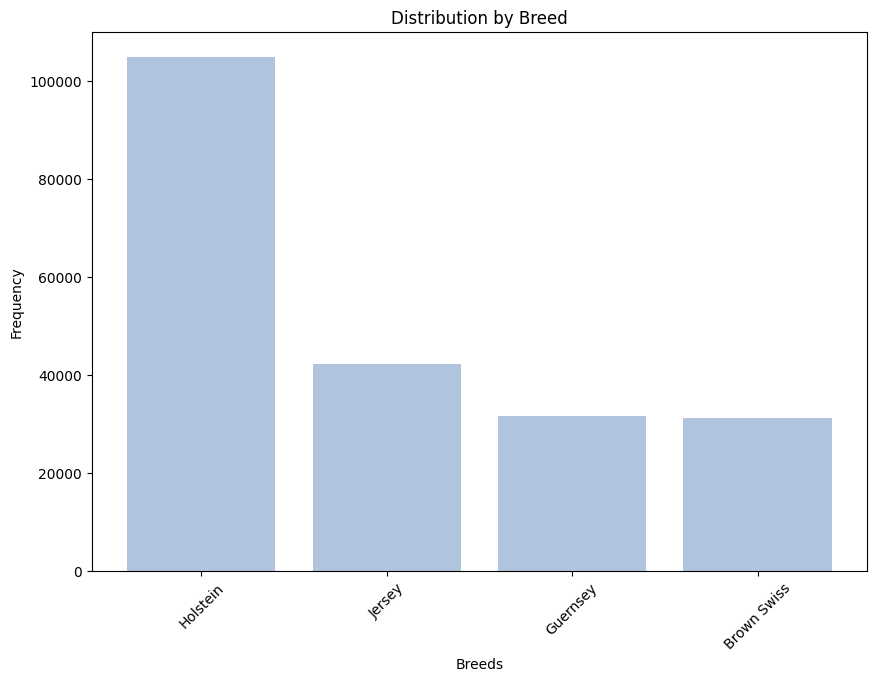

' Randomundersampling or SMOTE may need to be performed to even out class imbalance. '

In [ ]:
# Get distribution of cattle breeds
plt.figure(figsize = (10, 7))
cattle_cats = train_data['Breed'].value_counts()
plt.bar(cattle_cats.index, cattle_cats.values, color = 'lightsteelblue')
plt.xticks(rotation = 45)
plt.xlabel("Breeds")
plt.ylabel("Frequency")
plt.title("Distribution by Breed")
plt.show()
''' Randomundersampling or SMOTE may need to be performed to even out class imbalance. '''

In [ ]:
climate_scores_grouped = train_data.groupby('Climate_Zone')[['Ambient_Temperature_C', 'Humidity_percent']].agg(['median', 'mean']).reset_index()
climate_scores_grouped


Climate_Zone Ambient_Temperature_C            Humidity_percent           
                                median       mean           median       mean
0           Arid             22.051312  21.927998             60.1  59.844307
1    Continental             22.170384  21.973933             59.8  59.770082
2  Mediterranean             22.060612  21.973833             59.9  59.769529
3    Subtropical             21.793162  21.746515             60.0  59.782654
4      Temperate             21.904796  21.817965             60.0  59.804423
5       Tropical             22.008471  21.862548             60.0  59.912948

In [ ]:
pd.crosstab(train_data['Management_System'], train_data['Climate_Zone'])


Climate_Zone,Arid,Continental,Mediterranean,Subtropical,Temperate,Tropical
Management_System,,,,,,
Extensive,7083,6924,6901,7080,6935,7050
Intensive,6843,7071,7063,7019,7198,7031
Mixed,7067,6921,7048,6903,6895,6936
Pastoral,7086,7029,6888,6976,7193,6954
Semi_Intensive,6875,6884,7094,6959,7003,7091


In [ ]:
# Is management system relevant?
manage_relevance = train_data.groupby('Management_System')['Milk_Yield_L'].agg(['mean', 'median']).reset_index()
manage_relevance

,Management_System,mean,median
0,Extensive,15.611051,15.160705
1,Intensive,15.597595,15.140754
2,Mixed,15.575982,15.141565
3,Pastoral,15.585199,15.153885
4,Semi_Intensive,15.575829,15.130235


In [ ]:
# Is breed relevant?
breed_relevance = train_data.groupby('Breed')['Milk_Yield_L'].agg(['mean', 'median']).reset_index()
breed_relevance

,Breed,mean,median
0,Brown Swiss,15.573162,15.088798
1,Guernsey,15.584932,15.147518
2,Holstein,15.597385,15.165496
3,Jersey,15.583716,15.140813


In [ ]:
# Get correlation between seemingly similar fields
corr = train_data['Age_Months'].corr(train_data['Weight_kg'])
print("Correlation between Age_Months and Weight_kg: " + (str)(corr))

corr2 = train_data['Feed_Quantity_kg'].corr(train_data['Feeding_Frequency'])
print("Correlation between Feed_Quantity_kg and Feeding_Frequency: " + (str)(corr2))
# Feeding_Frequency only has 5 unique values: {2, 4, 5, 1, 3}

Correlation between Age_Months and Weight_kg: 0.002184399593874527
Correlation between Feed_Quantity_kg and Feeding_Frequency: 0.0013519911526318575


In [ ]:
lactation_grouped = train_data.groupby('Lactation_Stage')['Days_in_Milk'].agg(['median', 'mean']).reset_index()
lactation_grouped

,Lactation_Stage,median,mean
0,Early,182.0,181.915542
1,Late,182.0,182.270150
2,Mid,182.0,182.143846


In [ ]:
# Is Feed_Type relevant?
feed_relevance = train_data.groupby('Feed_Type')['Milk_Yield_L'].agg(['mean', 'median']).reset_index()
feed_relevance

,Feed_Type,mean,median
0,Concentrates,15.608278,15.168043
1,Crop_Residues,15.598980,15.132459
2,Dry_Fodder,15.553628,15.139369
3,Green_Fodder,15.589990,15.194562
4,Hay,15.619794,15.154139
5,Mixed_Feed,15.594253,15.155086
6,Pasture_Grass,15.528221,15.078080
7,Silage,15.621009,15.147520


In [ ]:
# Vaccine Feature Exploration
vaccine_cols = [
    "FMD_Vaccine", "Brucellosis_Vaccine", "HS_Vaccine", "BQ_Vaccine",
    "Anthrax_Vaccine", "IBR_Vaccine", "BVD_Vaccine", "Rabies_Vaccine"
]

for vaccine in vaccine_cols:
    means = train_data.groupby(vaccine)["Milk_Yield_L"].mean()
    diff = means.get(1, 0) - means.get(0, 0)
    print(f"{vaccine}:")
    print(f"  Mean without vaccine: {means[0]}")
    print(f"  Mean with vaccine:    {means[1]}")
    print(f"  Difference:           {means[1] - means[0]}")

FMD_Vaccine:
  Mean without vaccine: 15.605368951101646
  Mean with vaccine:    15.578313622189981
  Difference:           -0.027055328911664844
Brucellosis_Vaccine:
  Mean without vaccine: 15.57546023918317
  Mean with vaccine:    15.598283114084271
  Difference:           0.022822874901100576
HS_Vaccine:
  Mean without vaccine: 15.589380435555364
  Mean with vaccine:    15.589005485921462
  Difference:           -0.00037494963390294345
BQ_Vaccine:
  Mean without vaccine: 15.59221674358604
  Mean with vaccine:    15.587120773456428
  Difference:           -0.00509597012961116
Anthrax_Vaccine:
  Mean without vaccine: 15.132294156631406
  Mean with vaccine:    15.893246741629286
  Difference:           0.7609525849978791
IBR_Vaccine:
  Mean without vaccine: 15.116646335601114
  Mean with vaccine:    15.905721128906093
  Difference:           0.7890747933049784
BVD_Vaccine:
  Mean without vaccine: 15.585936637060517
  Mean with vaccine:    15.591303141719978
  Difference:           0.005

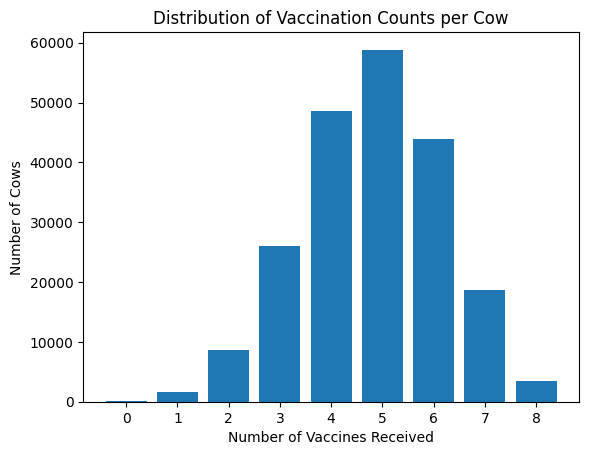

In [ ]:
train_data["Num_Vaccines"] = train_data[vaccine_cols].sum(axis=1)
vaccine_counts = train_data["Num_Vaccines"].value_counts().sort_index()

plt.bar(vaccine_counts.index, vaccine_counts.values)
plt.xlabel("Number of Vaccines Received")
plt.ylabel("Number of Cows")
plt.title("Distribution of Vaccination Counts per Cow")
plt.xticks(range(0, len(vaccine_cols) + 1))
plt.show()

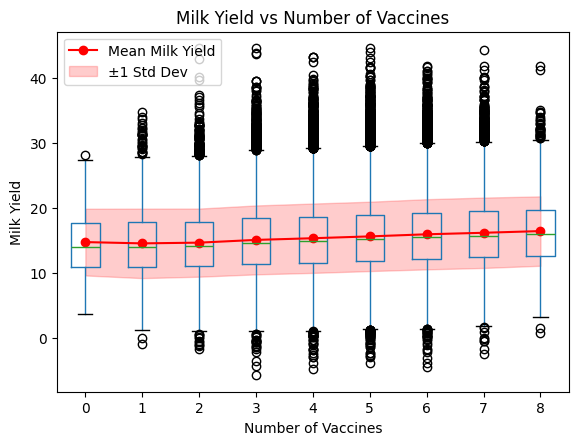

In [ ]:
grouped = train_data.groupby("Num_Vaccines")["Milk_Yield_L"]

mean_yield = grouped.mean()
std_yield = grouped.std()

train_data.boxplot(column="Milk_Yield_L", by="Num_Vaccines", grid=False)
plt.title("Milk Yield vs Number of Vaccines")
plt.suptitle("")
plt.xlabel("Number of Vaccines")
plt.ylabel("Milk Yield")
plt.plot(mean_yield.index +1, mean_yield.values, color="red", marker="o", label="Mean Milk Yield")
plt.fill_between(mean_yield.index +1,
                 mean_yield - std_yield,
                 mean_yield + std_yield,
                 color="red", alpha=0.2, label="±1 Std Dev")
plt.legend()
plt.show()

In [ ]:
'''
So, we can did get rid of the 8 vaccine columns and replace it by a single column
that determines the number of vaccines the cow has had, however this did not change
the error that greatly, so our final model does not have this.
'''

train_data = train_data.drop(columns=vaccine_cols)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Breed                    210000 non-null  object 
 1   Climate_Zone             210000 non-null  object 
 2   Management_System        210000 non-null  object 
 3   Age_Months               210000 non-null  int64  
 4   Weight_kg                210000 non-null  float64
 5   Parity                   210000 non-null  int64  
 6   Lactation_Stage          210000 non-null  object 
 7   Days_in_Milk             210000 non-null  int64  
 8   Feed_Type                210000 non-null  object 
 9   Feed_Quantity_kg         199519 non-null  float64
 10  Feeding_Frequency        210000 non-null  int64  
 11  Water_Intake_L           210000 non-null  float64
 12  Walking_Distance_km      210000 non-null  float64
 13  Grazing_Duration_hrs     210000 non-null  float64
 14  Rumi

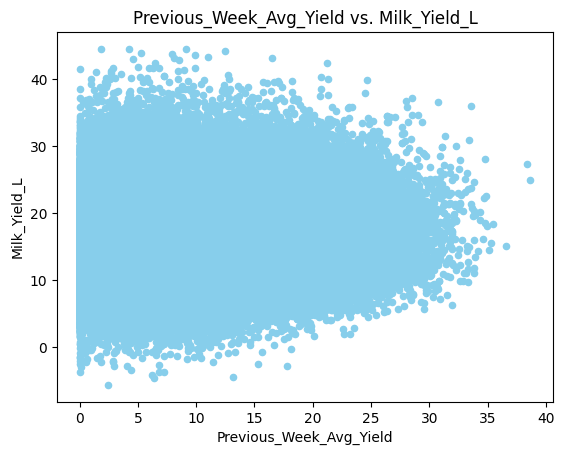

In [ ]:
# Previous_Week_Avg_Yield Feature Exploration
train_data.plot.scatter(x='Previous_Week_Avg_Yield', y='Milk_Yield_L',
                        xlabel='Previous_Week_Avg_Yield', ylabel='Milk_Yield_L',
                       title='Previous_Week_Avg_Yield vs. Milk_Yield_L', color='skyblue')
plt.show()

In [ ]:
train_data["Yield_Diff"] = train_data["Milk_Yield_L"] - train_data["Previous_Week_Avg_Yield"]

print(train_data["Yield_Diff"].describe(), "\n")
print(train_data[["Milk_Yield_L", "Previous_Week_Avg_Yield", "Yield_Diff"]].head())

count    210000.000000
mean          6.841572
std           7.602496
min         -25.721975
25%           1.890692
50%           7.039772
75%          11.917566
max          42.670375
Name: Yield_Diff, dtype: float64 

   Milk_Yield_L  Previous_Week_Avg_Yield  Yield_Diff
0     12.192634                     6.31    5.882634
1     14.717031                    17.16   -2.442969
2     14.006142                     4.07    9.936142
3     24.324325                    10.23   14.094325
4     12.023074                    20.68   -8.656926


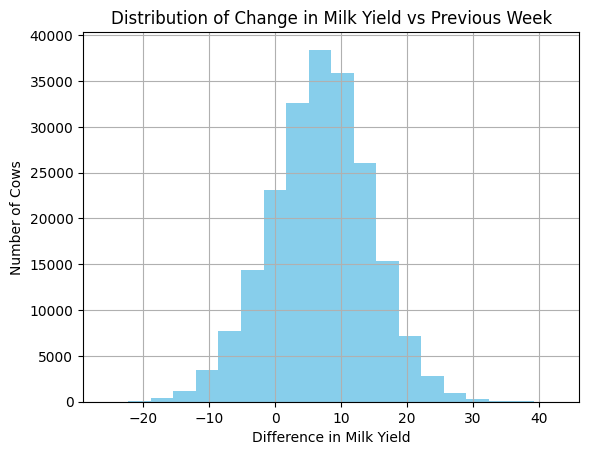

In [ ]:
train_data["Yield_Diff"].hist(bins=20, color='skyblue')
plt.title("Distribution of Change in Milk Yield vs Previous Week")
plt.xlabel("Difference in Milk Yield")
plt.ylabel("Number of Cows")
plt.show()

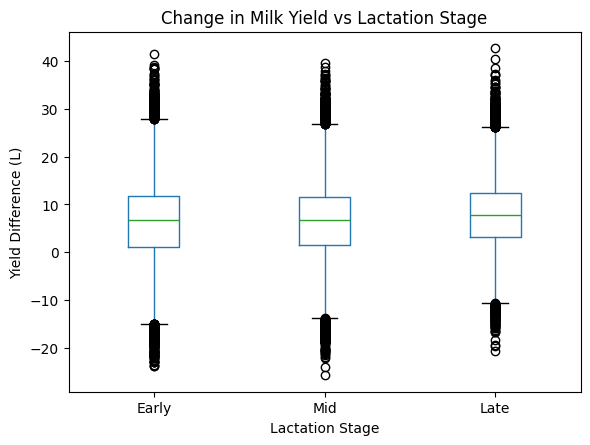

In [ ]:
stage_order = ["Early", "Mid", "Late"]
train_data["Lactation_Stage"] = pd.Categorical(
    train_data["Lactation_Stage"],
    categories=stage_order,
    ordered=True
)

train_data.boxplot(column="Yield_Diff", by="Lactation_Stage", grid=False)
plt.title("Change in Milk Yield vs Lactation Stage")
plt.suptitle("")
plt.xlabel("Lactation Stage")
plt.ylabel("Yield Difference (L)")
plt.show()
train_data = train_data.drop('Yield_Diff', axis=1)

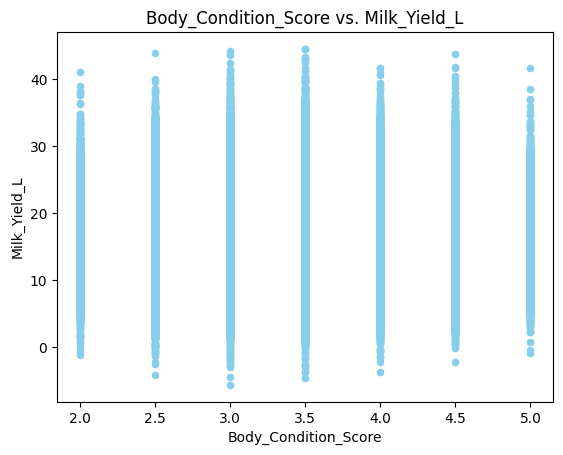

In [ ]:
# Body_Condition_Score Feature Exploration
train_data.plot.scatter(x='Body_Condition_Score', y='Milk_Yield_L',
                        xlabel='Body_Condition_Score', ylabel='Milk_Yield_L',
                       title='Body_Condition_Score vs. Milk_Yield_L', color='skyblue')
plt.show()

Body_Condition_Score
2.0    15.620485
2.5    15.601143
3.0    15.585647
3.5    15.596995
4.0    15.577655
4.5    15.553167
5.0    15.607822
Name: Milk_Yield_L, dtype: float64 



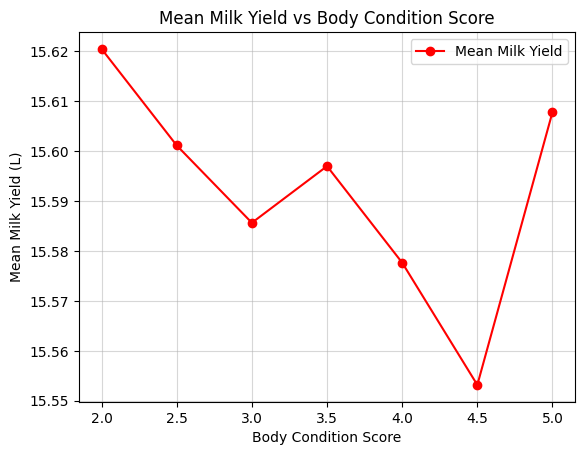

In [ ]:
means = train_data.groupby("Body_Condition_Score")["Milk_Yield_L"].mean()
print(means, "\n")

plt.plot(means.index, means.values, marker='o', color='red', label='Mean Milk Yield')
plt.title("Mean Milk Yield vs Body Condition Score")
plt.xlabel("Body Condition Score")
plt.ylabel("Mean Milk Yield (L)")
plt.grid(True, linestyle="-", alpha=0.5)
plt.legend()
plt.show()

Milking Interval Hours:  [12 24  8  6] 



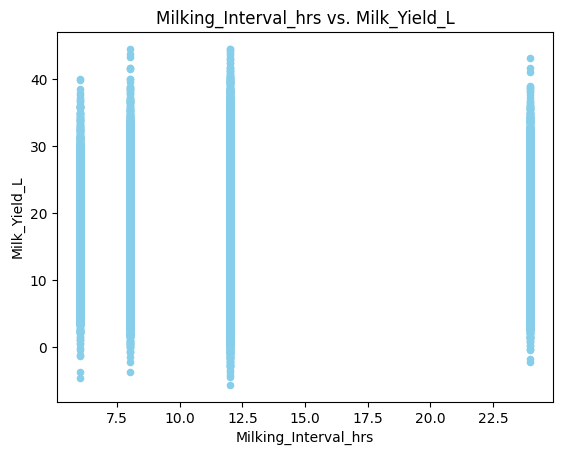

In [ ]:
# Milking_Interval_hrs Feature Exploration
print("Milking Interval Hours: ", train_data["Milking_Interval_hrs"].unique(), "\n")
train_data.plot.scatter(x='Milking_Interval_hrs', y='Milk_Yield_L',
                        xlabel='Milking_Interval_hrs', ylabel='Milk_Yield_L',
                       title='Milking_Interval_hrs vs. Milk_Yield_L', color='skyblue')
plt.show()

Milking_Interval_hrs
6     15.544284
8     15.489589
12    15.581947
24    15.811043
Name: Milk_Yield_L, dtype: float64 



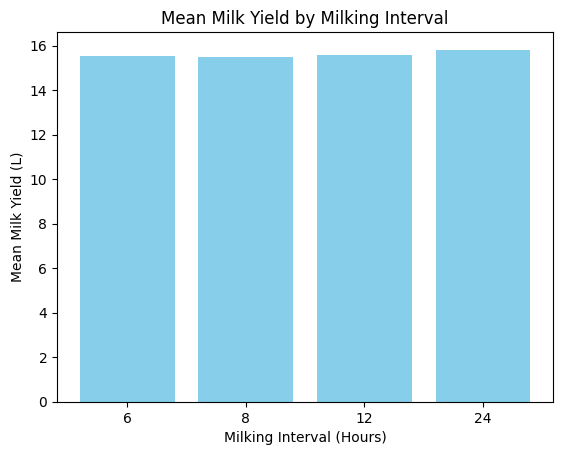

In [ ]:
mean_yield_by_interval = train_data.groupby("Milking_Interval_hrs")["Milk_Yield_L"].mean().sort_index()
print(mean_yield_by_interval, "\n")

plt.bar(mean_yield_by_interval.index.astype(str), mean_yield_by_interval.values, color='skyblue')
plt.title("Mean Milk Yield by Milking Interval")
plt.xlabel("Milking Interval (Hours)")
plt.ylabel("Mean Milk Yield (L)")
plt.show()

In [ ]:
features = train_data.columns[11:19]

# Make a 3x3 grid for 9 features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(train_data[feature], train_data['Milk_Yield_L'])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Milk Yield (L)')

#add last column
axes[8].scatter(train_data['Mastitis'], train_data['Milk_Yield_L'])
axes[8].set_xlabel('Mastitis')
axes[8].set_ylabel('Milk Yield (L)')

NameError: name 'train_data' is not defined

Water Intake Mean:  80.03685003777588
Water Intake Median:  80.01697287808932


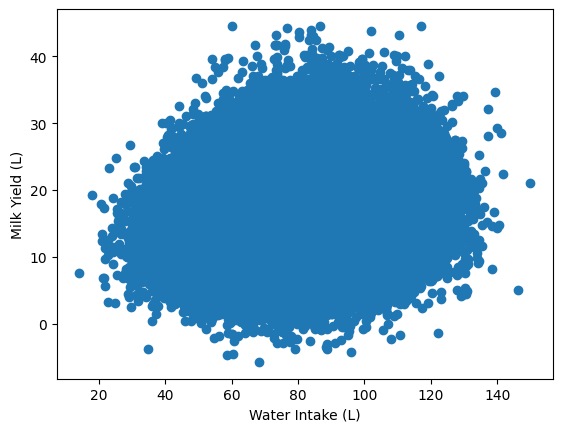

In [ ]:
# is there a correlation between water intake and milk yield?
print('Water Intake Mean: ', train_data['Water_Intake_L'].mean())
print('Water Intake Median: ', train_data['Water_Intake_L'].median())
# type(plt.xlabel)
plt.scatter(train_data['Water_Intake_L'], train_data['Milk_Yield_L'])
plt.xlabel('Water Intake (L)')
plt.ylabel('Milk Yield (L)')
plt.show()

/tmp/ipython-input-889909891.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for label, group in train_data.groupby('Water_Bin'):


14-41  	mean:  13.566898502766136
14-41  	median:  13.17969975811076 

41-68  	mean:  14.693329904678889
41-68  	median:  14.300774755069755 

68-95  	mean:  15.669708156843326
68-95  	median:  15.22373170723338 

95-122  	mean:  16.605523829339603
95-122  	median:  16.16603374726798 

122-149  	mean:  17.65306332859529
122-149  	median:  17.55220342987963 



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


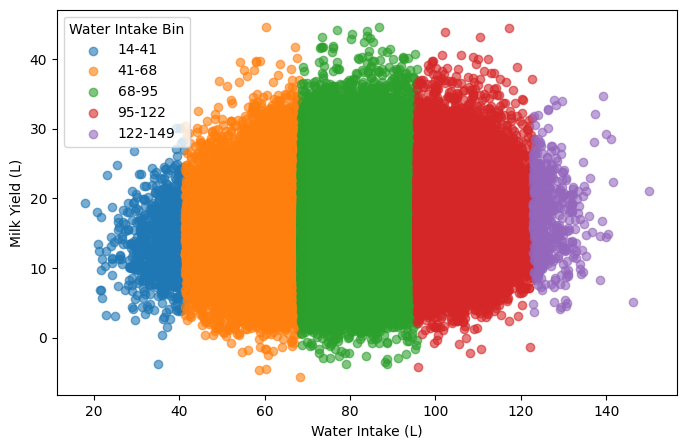

In [ ]:
# the correlation doesn't look very strong
# does binning make it more obvious?

# Create bin labels
bins = np.linspace(train_data['Water_Intake_L'].min(),
                   train_data['Water_Intake_L'].max(), 6)
labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
train_data['Water_Bin'] = pd.cut(train_data['Water_Intake_L'], bins=bins, labels=labels)

# Scatter plot color-coded by bin
plt.figure(figsize=(8,5))
for label, group in train_data.groupby('Water_Bin'):
    plt.scatter(group['Water_Intake_L'], group['Milk_Yield_L'], label=label, alpha=0.6)
    print(label, " \tmean: ", group['Milk_Yield_L'].mean())
    print(label, " \tmedian: ", group['Milk_Yield_L'].median(), '\n')

plt.xlabel('Water Intake (L)')
plt.ylabel('Milk Yield (L)')
plt.legend(title='Water Intake Bin')
plt.show()

Brown Swiss  	mean:  15.573162215068459
Brown Swiss  	median:  15.088797590547914 

Guernsey  	mean:  15.584931810071545
Guernsey  	median:  15.14751811318637 

Holstein  	mean:  15.597385089158596
Holstein  	median:  15.1654963346713 

Jersey  	mean:  15.58371571854432
Jersey  	median:  15.140812730772074 



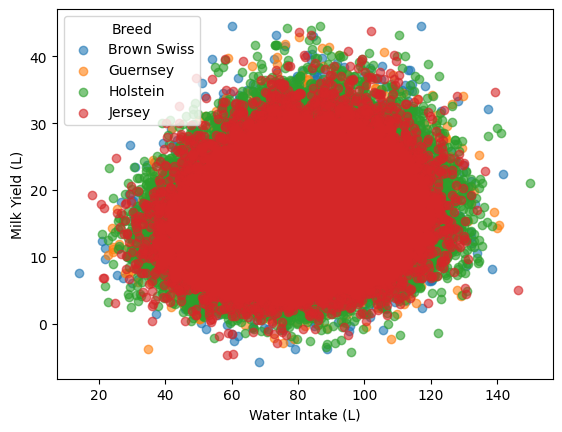

In [ ]:
# does water intake change by breed? -- No

for label, group in train_data.groupby('Breed'):
    plt.scatter(group['Water_Intake_L'], group['Milk_Yield_L'], label=label, alpha=0.6)
    print(label, " \tmean: ", group['Milk_Yield_L'].mean())
    print(label, " \tmedian: ", group['Milk_Yield_L'].median(), '\n')
plt.xlabel('Water Intake (L)')
plt.ylabel('Milk Yield (L)')
plt.legend(title='Breed')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


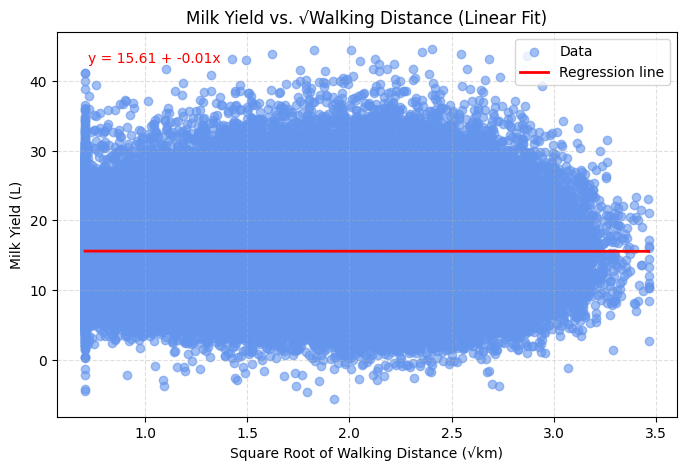

In [ ]:
# Apply square root transformation
x = np.sqrt(train_data['Walking_Distance_km'])
y = train_data['Milk_Yield_L']

# Compute linear regression coefficients
# slope (b) and intercept (a)
b, a = np.polyfit(x, y, 1)

# Generate fitted values
y_pred = a + b * x

# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.6, color='cornflowerblue', label='Data')

# Regression line
x_line = np.linspace(x.min(), x.max(), 100)
y_line = a + b * x_line
plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Regression line')

# Labels and title
plt.xlabel('Square Root of Walking Distance (√km)')
plt.ylabel('Milk Yield (L)')
plt.title('Milk Yield vs. √Walking Distance (Linear Fit)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)

# Show regression equation on plot
plt.text(
    0.05, 0.95,
    f'y = {a:.2f} + {b:.2f}x',
    transform=plt.gca().transAxes,
    fontsize=10,
    color='red',
    verticalalignment='top'
)

plt.show()

/tmp/ipython-input-312034829.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = train_data.groupby('Walking_Bins')['Milk_Yield_L'].mean().reset_index()


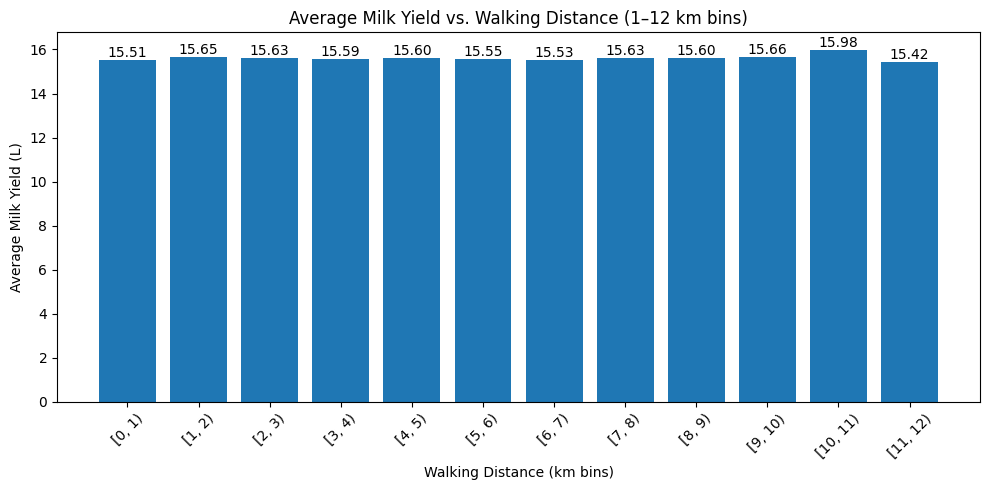

In [ ]:
# walking distance
# print('Walking Distance Min: ', train_data['Walking_Distance_km'].min())
# print('Walking Distance Max: ', train_data['Walking_Distance_km'].max())
# print('Walking Distance Mean: ', train_data['Walking_Distance_km'].mean())
# print('Walking Distance Median: ', train_data['Walking_Distance_km'].median())

bins = []
for i in range(13):
  bins.append(i)
# Bin walking distances
train_data['Walking_Bins'] = pd.cut(train_data['Walking_Distance_km'], bins=bins, right=False)

# Compute mean milk yield per bin
bin_means = train_data.groupby('Walking_Bins')['Milk_Yield_L'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
bars = plt.bar(bin_means['Walking_Bins'].astype(str), bin_means['Milk_Yield_L'])

# Add labels on top of each bar
for bar, mean_val in zip(bars, bin_means['Milk_Yield_L']):
    plt.text(
        bar.get_x() + bar.get_width()/2,     # x position (center of bar)
        bar.get_height(),                    # y position (top of bar)
        f'{mean_val:.2f}',                   # formatted mean value
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Titles and labels
plt.xlabel('Walking Distance (km bins)')
plt.ylabel('Average Milk Yield (L)')
plt.title('Average Milk Yield vs. Walking Distance (1–12 km bins)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


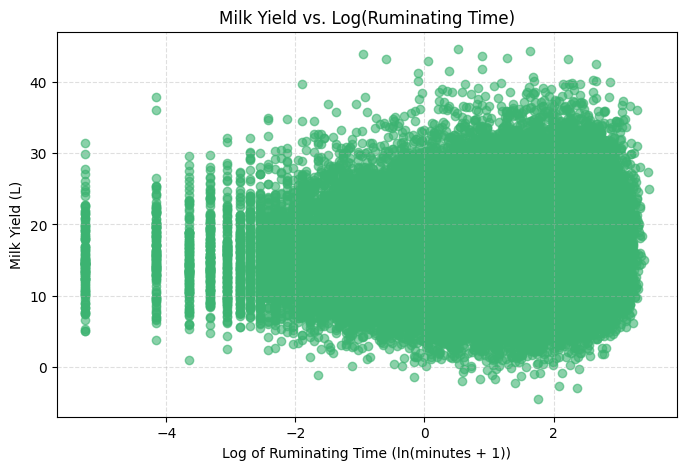

In [ ]:
# Apply log transformation (handle zeros safely)
train_data['Log_Ruminating_Time'] = np.log(train_data['Rumination_Time_hrs'] + 1)

# Scatter plot: log(Ruminating_Time) vs Milk_Yield
plt.figure(figsize=(8, 5))
plt.scatter(train_data['Log_Ruminating_Time'], train_data['Milk_Yield_L'],
            alpha=0.6, color='mediumseagreen')

plt.xlabel('Log of Ruminating Time (ln(minutes + 1))')
plt.ylabel('Milk Yield (L)')
plt.title('Milk Yield vs. Log(Ruminating Time)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

In [ ]:
# print(train_data['Rumination_Time_hrs'].head())
negative = train_data[train_data['Rumination_Time_hrs'] <= 0]
positive = train_data[train_data['Rumination_Time_hrs'] > 0]

print('negative rumination mean: ', negative['Milk_Yield_L'].mean())
print('positive rumination mean: ', positive['Milk_Yield_L'].mean())

negative rumination mean:  15.257149921026496
positive rumination mean:  15.997054318708383


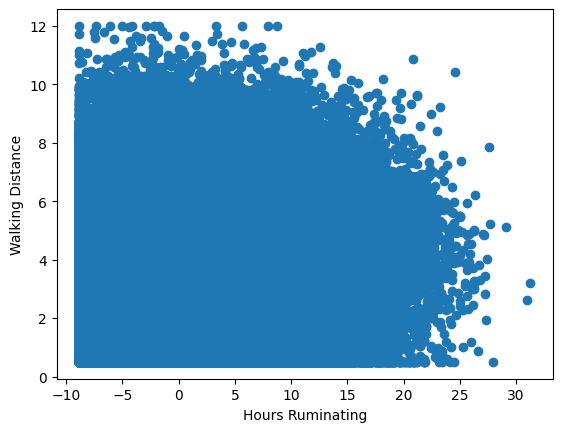

In [ ]:
# ruminating vs walking
plt.scatter(train_data['Rumination_Time_hrs'], train_data['Walking_Distance_km'])
plt.xlabel('Hours Ruminating')
plt.ylabel('Walking Distance')
plt.show()

# pd.drop(train_data['Walking_Bins'])
# pd.drop(train_data['Water_Bin'])
train_data = train_data.drop('Walking_Bins', axis=1)
train_data = train_data.drop('Water_Bin', axis=1)
train_data = train_data.drop('Log_Ruminating_Time', axis=1)


In [ ]:
# Create a correlation matrix
train_data.drop(['Cattle_ID', 'Date', 'Farm_ID', 'Feed_Quantity_lb'], axis = 1, inplace = True)
data_encoded = pd.get_dummies(train_data, drop_first=False)
# data_encoded.corr()
corr_with_target = data_encoded.corr()["Milk_Yield_L"].abs().sort_values(ascending=False)
print(corr_with_target)

Milk_Yield_L                        1.000000
Age_Months                          0.309188
Weight_kg                           0.300464
Parity                              0.236565
Feed_Quantity_kg                    0.223288
Water_Intake_L                      0.124911
Mastitis                            0.122614
Rumination_Time_hrs                 0.089823
Previous_Week_Avg_Yield             0.089823
Lactation_Stage_Early               0.083668
IBR_Vaccine                         0.072263
Anthrax_Vaccine                     0.069642
Rabies_Vaccine                      0.068618
Lactation_Stage_Late                0.068245
Days_in_Milk                        0.062554
Ambient_Temperature_C               0.042036
Milking_Interval_hrs                0.014734
Lactation_Stage_Mid                 0.014530
Grazing_Duration_hrs                0.004350
Feed_Type_Pasture_Grass             0.004308
Housing_Score                       0.004008
Feed_Type_Dry_Fodder                0.002526
Breed_Brow

## Model 1: KNN Regressor

We began with a KNN regressor as our baseline model. Since it was one of the first algorithms introduced in class, it provided a familiar and straightforward starting point for assessing how different feature engineering choices affected RMSE.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from category_encoders import CountEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
train_data_knn = pd.read_csv("cattle_data_train.csv")
train_data_knn['Breed'] = train_data_knn['Breed'].str.strip().str.title()
train_data_knn['Breed'] = train_data_knn['Breed'].replace({'Holstien': 'Holstein'})
train_data_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Cattle_ID                210000 non-null  object 
 1   Breed                    210000 non-null  object 
 2   Climate_Zone             210000 non-null  object 
 3   Management_System        210000 non-null  object 
 4   Age_Months               210000 non-null  int64  
 5   Weight_kg                210000 non-null  float64
 6   Parity                   210000 non-null  int64  
 7   Lactation_Stage          210000 non-null  object 
 8   Days_in_Milk             210000 non-null  int64  
 9   Feed_Type                210000 non-null  object 
 10  Feed_Quantity_kg         199519 non-null  float64
 11  Feeding_Frequency        210000 non-null  int64  
 12  Water_Intake_L           210000 non-null  float64
 13  Walking_Distance_km      210000 non-null  float64
 14  Graz

In [ ]:
vaccine_cols = ["FMD_Vaccine", "Brucellosis_Vaccine", "HS_Vaccine", "BQ_Vaccine",
                "Anthrax_Vaccine", "IBR_Vaccine", "BVD_Vaccine", "Rabies_Vaccine"]
train_data_knn["Num_Vaccines"] = train_data_knn[vaccine_cols].sum(axis=1)
train_data_knn.head()

,Cattle_ID,Breed,Climate_Zone,Management_System,Age_Months,Weight_kg,Parity,Lactation_Stage,Days_in_Milk,Feed_Type,...,Rabies_Vaccine,Previous_Week_Avg_Yield,Body_Condition_Score,Milking_Interval_hrs,Date,Farm_ID,Feed_Quantity_lb,Mastitis,Milk_Yield_L,Num_Vaccines
0,CATTLE_133713,Holstein,Tropical,Intensive,114,544.8,4,Mid,62,Concentrates,...,1,6.31,3.0,12,2024-01-15,FARM_0301,36.8235,1,12.192634,4
1,CATTLE_027003,Holstein,Arid,Mixed,136,298.9,4,Mid,213,Crop_Residues,...,0,17.16,4.0,12,2023-10-31,FARM_0219,NaN,0,14.717031,3
2,CATTLE_122459,Holstein,Tropical,Semi_Intensive,64,336.6,4,Late,16,Hay,...,0,4.07,3.5,12,2024-05-20,FARM_0802,16.0965,0,14.006142,4
3,CATTLE_213419,Jersey,Mediterranean,Intensive,58,370.5,1,Early,339,Crop_Residues,...,0,10.23,3.0,24,2024-07-22,FARM_0034,40.7925,0,24.324325,3
4,CATTLE_106260,Guernsey,Subtropical,Intensive,84,641.5,6,Early,125,Mixed_Feed,...,1,20.68,3.0,12,2023-01-03,FARM_0695,33.7365,1,12.023074,6


In [ ]:
# First, we tried frequency encoding all of the categorical variables.
'''
Based on insights gained from data exploration, we decided to drop Humidity_percent and
Climate_Zone, as these were indicative of the same information descrived in
Ambient Temperature.
We also added a Num_Vaccines column, which described the number of vaccines
a cow had.
We further dropped the columns 'Cattle_ID', 'Date', 'Farm_ID', and 'Feed_Quantity_lb'.
Cattle_ID and Farm_ID represent ID values, which led us to drop them. There are 2 Feed_Quantity
values (one in kgs and one in lbs). Logically, we could not see a way Date would correlate to milk yield,
leading us to drop it.
'''
train_data_knn.drop(['Cattle_ID', 'Date', 'Farm_ID', 'Feed_Quantity_lb'], axis = 1, inplace = True)
train_data_knn.drop(['Climate_Zone', 'Humidity_percent'], axis = 1, inplace = True)
train_data_knn_features = train_data_knn.drop('Milk_Yield_L', axis = 1)
labels = train_data_knn['Milk_Yield_L']

scaler = StandardScaler()
imputer = SimpleImputer(strategy="median")
knn_reg = KNeighborsRegressor(n_neighbors=7)
encoder = CountEncoder(normalize=True)

pipe_obj = Pipeline([('encode', encoder), ('impute', imputer), ('scaler', scaler), ('knn', knn_reg)])

# Use RMSE scoring
scores_knn = cross_val_score(pipe_obj, train_data_knn_features, labels, cv=5, scoring='neg_root_mean_squared_error')

# Take the negative because sklearn returns negative errors
print(f"Average RMSE: {-scores_knn.mean():.4f}")

Average RMSE: 4.8582


In [ ]:
'''
Decided to drop the vaccine columns. Only using num_vaccines.
'''

train_data_knn.drop(vaccine_cols, axis = 1, inplace = True)
train_data_knn_features = train_data_knn.drop('Milk_Yield_L', axis = 1)
labels = train_data_knn['Milk_Yield_L']

scaler = StandardScaler()
imputer = SimpleImputer(strategy="median")
knn_reg = KNeighborsRegressor(n_neighbors=7)
encoder = CountEncoder(normalize=True)

pipe_obj = Pipeline([('encode', encoder), ('impute', imputer), ('scaler', scaler), ('knn', knn_reg)])

# Use RMSE scoring
scores_knn = cross_val_score(pipe_obj, train_data_knn_features, labels, cv=5, scoring='neg_root_mean_squared_error')

# Take the negative because sklearn returns negative errors
print(f"Average RMSE: {-scores_knn.mean():.4f}")

Average RMSE: 4.7762


Feature Selection Reasoning: We heavily referenced our list sorting the dataset's features in terms of correlation to milk yield while experimenting with what features to keep and drop. We iteratively tried many combinations of features. We wanted to keep features that were highly correlated with milk yield (both posively or negatively), but not highly correlated with other kept features. This guided our feature selection process.

In [ ]:
'''
We played around with adding and dropping various columns in the dataset. We heavily
referenced the list describing various features' correlations with
Milk Yield. We kept the pipeline (scaling, imputation by median, frequency encoding, and # of neighbors)
the same to allow us to determine a low error set of fearures to use. After
numerous trials of dropping various columns and checking the RMSE, we determined the following set
of features to be the best at this time.
'''

train_data_feat = pd.read_csv("cattle_data_train.csv")
train_data_feat = train_data_feat[['Age_Months', 'Weight_kg', 'Parity', 'Feed_Quantity_kg', 'Water_Intake_L', 'Mastitis', 'Rumination_Time_hrs', 'Previous_Week_Avg_Yield', 'Lactation_Stage', 'Days_in_Milk', 'Ambient_Temperature_C', "Anthrax_Vaccine", "IBR_Vaccine", "Rabies_Vaccine", 'Milk_Yield_L']]
features = train_data_feat.drop(['Milk_Yield_L'], axis = 1)
labels = train_data_feat['Milk_Yield_L']

scaler = StandardScaler()
imputer = SimpleImputer(strategy="median")
knn_reg = KNeighborsRegressor(n_neighbors=7)
encoder = CountEncoder(normalize=True)

pipe_obj = Pipeline([('encode', encoder), ('impute', imputer), ('scaler', scaler), ('knn', knn_reg)])

# Use RMSE scoring
scores_knn = cross_val_score(pipe_obj, features, labels, cv=5, scoring='neg_root_mean_squared_error')

# Take the negative because sklearn returns negative errors
print(f"Average RMSE: {-scores_knn.mean():.4f}")


Average RMSE: 4.6480


In [ ]:
'''
Next, we tried one-hot encoding.
'''

scaler = StandardScaler()
imputer = SimpleImputer(strategy="median")
knn_reg = KNeighborsRegressor(n_neighbors=7)
encoder = OneHotEncoder(use_cat_names=True)

pipe_obj = Pipeline([('encode', encoder), ('impute', imputer), ('scaler', scaler), ('knn', knn_reg)])

# Use RMSE scoring
scores_knn = cross_val_score(pipe_obj, features, labels, cv=5, scoring='neg_root_mean_squared_error')

# Take the negative because sklearn returns negative errors
print(f"Average RMSE: {-scores_knn.mean():.4f}")



Average RMSE: 4.6382


In [ ]:
'''
Next, we tried to find the best number of neighbors to use. We iteratively
tried values from 7 - 40 and wanted to test a larger number of neighbors.
We used the grid search below.
'''
train_data_feat = pd.read_csv("cattle_data_train.csv")
train_data_feat = train_data_feat[['Age_Months', 'Weight_kg', 'Parity', 'Feed_Quantity_kg', 'Water_Intake_L', 'Mastitis', 'Rumination_Time_hrs', 'Previous_Week_Avg_Yield', 'Lactation_Stage', 'Days_in_Milk', 'Ambient_Temperature_C', "Anthrax_Vaccine", "IBR_Vaccine", "Rabies_Vaccine", 'Milk_Yield_L']]
features = train_data_feat.drop(['Milk_Yield_L'], axis = 1)
labels = train_data_feat['Milk_Yield_L']

scaler = StandardScaler()
imputer = SimpleImputer(strategy="median")
knn_reg = KNeighborsRegressor()
encoder = OneHotEncoder(handle_unknown='ignore')

pipe_obj = Pipeline([('encode', encoder), ('impute', imputer), ('scaler', scaler), ('knn', knn_reg)])

param_grid = {
    'knn__n_neighbors': list(range(43, 133, 5))
}

grid = GridSearchCV(estimator=pipe_obj, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

grid.fit(features, labels)

print("Best RMSE:", -grid.best_score_)
print("Best Params:", grid.best_params_)

Best RMSE: 4.409494067623563
Best Params: {'knn__n_neighbors': 63}


In [ ]:
'''
We then wanted to determine if reducing the number of dimensions would
reduce the accuracy score through PCA. We therefore ran a GridSearch to determine
if this would be the case. We also tested setting the n_components of the PCA to various variance
values (such as keeping .80, .90, etc. of the variance), but we found the below n_components to work best.
Furthermore, throughout this whole hyperparameter tuning process, we continued to check
and see if adding or dropping a feature would result in a lower error.
It became the case that the set of features previously chosen continued to have the lowest
error out of all of the iterations we tested.
'''

scaler = StandardScaler()
imputer = SimpleImputer(strategy="median")
pca = PCA()
knn_reg = KNeighborsRegressor(n_neighbors = 63)
encoder = OneHotEncoder(handle_unknown='ignore')

pipe_obj = Pipeline([('encode', encoder), ('impute', imputer), ('scaler', scaler), ('pca', pca), ('knn', knn_reg)])

param_grid = {
    'pca__n_components': list(range(10, 15))
}

grid = GridSearchCV(estimator=pipe_obj, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

grid.fit(features, labels)

print("Best RMSE:", -grid.best_score_)
print("Best Params:", grid.best_params_)

Best RMSE: 4.409494067623563
Best Params: {'pca__n_components': 14}


We have 14 features in our training dataset, and the outcome of this grid search led us to not perform PCA in our pipeline.

In [ ]:
'''
Cross validation of best hyperparameter tuning we found. We didn't perform the grid searches
within the cross validation loop, as this took a significant amount of time. We aimed to reduce
RMSE through grid search runs and
cross validation loops in the interests pf time.
'''
scaler = StandardScaler()
knn_reg = KNeighborsRegressor(n_neighbors = 63)
encoder = OneHotEncoder(handle_unknown='ignore')
imputer = SimpleImputer(strategy="median")

pipe_obj = Pipeline([('encode', encoder), ('impute', imputer), ('scaler', scaler), ('knn', knn_reg)])

# Use RMSE scoring
scores_knn = cross_val_score(pipe_obj, features, labels, cv=5, scoring='neg_root_mean_squared_error')

# Take the negative because sklearn returns negative errors
print(f"Average RMSE: {-scores_knn.mean():.4f}")

Average RMSE: 4.4095


## Model 2: MLP Regressor
After trying a KNN regressor, we decided to try a neural net using sklearn.

In [ ]:
from sklearn.neural_network import MLPRegressor

train_data_regressor = pd.read_csv('cattle_data_train.csv')
train_data_regressor['Breed'] = train_data_regressor['Breed'].str.strip().str.title()
train_data_regressor['Breed'] = train_data_regressor['Breed'].replace({'Holstien': 'Holstein'})

We decided to start with the same feature engineering performed in the knn model.
We continued checking whether or not adding or removing features from this set
reduced the RMSE of our model. For example, we found that including the vaccines
"Anthrax_Vaccine", "IBR_Vaccine", and "Rabies_Vaccine" reduced our RMSE while
ensuring a low dimensionaliy in comparison to all of the vaccine columns. Furthermore,
we found that the inclusion of these three columns worked better than the
inclusion of Num_Vaccines, which was a created column describing the number of vaccines
each cow had. Furthermore, we found that including Ambient Temperature C produced the best
balance between low RMSE and low dimensionality in comparison to including this field
as well as Humidity percent and Climate Zone.
Furthermore, we tested various imputation techniques such as whether or not to impute
based on mean or median. We determined that median worked better, as this was less susceptible
to outliers. We also attempted to impute null values in Housing Score with the Housing
Score values based on Farm ID using a FunctionTransformer. This did not significantly
reduce our RMSE, and therefore, we decided to simply utilize imputation based on median of
the column.

In [ ]:
# Initial regressor model, imputation based on median
keep_data = train_data_regressor[['Age_Months', 'Weight_kg', 'Parity', 'Feed_Quantity_kg', 'Water_Intake_L', 'Mastitis', 'Rumination_Time_hrs', 'Previous_Week_Avg_Yield', 'Lactation_Stage', 'Days_in_Milk', 'Ambient_Temperature_C', "Anthrax_Vaccine", "IBR_Vaccine", "Rabies_Vaccine", 'Milk_Yield_L']]

features_neural = keep_data.drop(['Milk_Yield_L'], axis = 1)
labels = keep_data['Milk_Yield_L']

imputer = SimpleImputer(strategy="median")
scaler_neural = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore')
neural_regressor = MLPRegressor(hidden_layer_sizes=(32, ), activation='relu', max_iter=500)

pipeline_neural = Pipeline([('encoder', encoder), ('imputer_neural', imputer), ('scale_neural', scaler_neural), ('neural_regressor', neural_regressor)])

outer_score_neural = cross_val_score(pipeline_neural, features_neural, labels, cv = 5, scoring = 'neg_root_mean_squared_error')
print(f"Average Error: {-outer_score_neural.mean()}")

Average Error: 4.275910397246014


In [ ]:
# Initial regressor model, imputation based on mean
imputer = SimpleImputer(strategy="mean")
scaler_neural = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore')
neural_regressor = MLPRegressor(hidden_layer_sizes=(32, ), activation='relu', max_iter=500)
pipeline_neural = Pipeline([('encoder', encoder), ('imputer_neural', imputer), ('scale_neural', scaler_neural), ('neural_regressor', neural_regressor)])

outer_score_neural = cross_val_score(pipeline_neural, features_neural, labels, cv = 5, scoring = 'neg_root_mean_squared_error')
print(f"Average Error: {-outer_score_neural.mean()}")

Average Error: 4.284983922732083


We began our hyperparameter tuning by identifying the most effective activation function. To keep the grid search computationally doable, we separated the hyperparameter tuning process into first testing activation functions, then the number and size of hidden layers, learning rate, and so on. Throughout this process, we periodically checked cross-combinations (e.g., ReLU with 16 hidden layer size vs. tanh with 16 hidden layer size) to ensure that the choices we made in each stage worked with one another and consistently lowered RMSE.

In [ ]:
'''
We tested relu, tanh, and logistic. We found tanh to work best for our model.
'''

imputer = SimpleImputer(strategy="median")
scaler_neural = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore')
neural_regressor = MLPRegressor(hidden_layer_sizes=(32, ), activation='tanh', max_iter=500)
pipeline_neural = Pipeline([('encoder', encoder), ('imputer_neural', imputer), ('scale_neural', scaler_neural), ('neural_regressor', neural_regressor)])

outer_score_neural = cross_val_score(pipeline_neural, features_neural, labels, cv = 5, scoring = 'neg_root_mean_squared_error')
print(f"Average Error: {-outer_score_neural.mean()}")

Average Error: 4.255100277232484


In [ ]:
'''
We then tried mutiple hidden layer sizes/number of hidden layers. We tested both one layer and 2 layer models, and
we've included am example of one of our two layer models below. We tried numerous different sizes, such as 16, 32, 64, and 80.
We found that a one layer model of size 16 worked best.
'''

# Two layer model of size (32, 16)
imputer = SimpleImputer(strategy="median")
scaler_neural = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore')
neural_regressor = MLPRegressor(hidden_layer_sizes=(32, 16), activation='tanh', max_iter=500)
pipeline_neural = Pipeline([('encoder', encoder), ('imputer_neural', imputer), ('scale_neural', scaler_neural), ('neural_regressor', neural_regressor)])

outer_score_neural = cross_val_score(pipeline_neural, features_neural, labels, cv = 5, scoring = 'neg_root_mean_squared_error')
print(f"Average Error: {-outer_score_neural.mean()}")

Average Error: 4.273930261940305


In [ ]:
'''
We found a model with a layer of (32, ) to have the lowest error. Below is a
trial of a model with a hidden layer size of (16, ), which had a higher RMSE.
'''
# Model of one hidden layer of size 16
imputer = SimpleImputer(strategy="median")
scaler_neural = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore')
neural_regressor = MLPRegressor(hidden_layer_sizes=(16, ), activation='tanh', max_iter=500)
pipeline_neural = Pipeline([('encoder', encoder), ('imputer_neural', imputer), ('scale_neural', scaler_neural), ('neural_regressor', neural_regressor)])

outer_score_neural = cross_val_score(pipeline_neural, features_neural, labels, cv = 5, scoring = 'neg_root_mean_squared_error')
print(f"Average Error: {-outer_score_neural.mean()}")

Average Error: 4.261032123165955


Throughout this hyperparameter testing process, we continued to check if the combinations of best hyperparameters we were checking continued to
possess the lowest RMSE together (rather than another arbitraty combination of hyperparameter values). These checks affirmed our decisions and helped us continually make the best hyperparameter tuning decisions we could. We also periodically checked if the columns we selected continued to result in the lowest RMSE (by seeing if adding another feature dropped our RMSE or if deleting a certain column decreased our RMSE). This ensured we were continually checking our feature engineering to see if the columns we kept continued to result in the lowest RMSE of the combinations we tried.

In [ ]:
'''
We then tested an Adam vs SGD solver. We found an SGD solver provided a lower RMSE. From this, we tested various batch sizes (64, 128, and 256).
We found 128 to be the batch size that with the SGD solver resulted in the lowest RMSE.
'''

imputer = SimpleImputer(strategy="median")
scaler_neural = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore')
neural_regressor = MLPRegressor(solver = 'sgd', random_state = 35, hidden_layer_sizes=(32, ), activation='tanh', max_iter=500, batch_size=128)
pipeline_neural = Pipeline([('encoder', encoder), ('imputer_neural', imputer), ('scale_neural', scaler_neural), ('neural_regressor', neural_regressor)])

outer_score_neural = cross_val_score(pipeline_neural, features_neural, labels, cv = 5, scoring = 'neg_root_mean_squared_error')
print(f"Average Error: {-outer_score_neural.mean()}")

Average Error: 4.256906083341074


In [ ]:
# Example of a hyperparameter tuning sanity check we performed to ensure our tuning decisions provide the lowest RMSE in comparison to another combination

imputer = SimpleImputer(strategy="median")
scaler_neural = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore')
neural_regressor = MLPRegressor(solver = 'sgd', random_state = 35, hidden_layer_sizes=(16, ), activation='relu', max_iter=500, batch_size=128)
pipeline_neural = Pipeline([('encoder', encoder), ('imputer_neural', imputer), ('scale_neural', scaler_neural), ('neural_regressor', neural_regressor)])

outer_score_neural = cross_val_score(pipeline_neural, features_neural, labels, cv = 5, scoring = 'neg_root_mean_squared_error')
print(f"Average Error: {-outer_score_neural.mean()}")


Average Error: 4.28979971394688


In [ ]:
'''
We then tested various learning rates (.001, .005, .01) with the two types of learning rate schedulers we were allowed to use (adaptive and constant).
We found a learning rate of .005 with an adaptive scheduler type to work best. We further tested various momentum values (within the range of
.95 to .70), and we found a momentum of .80 to work best.
'''
imputer = SimpleImputer(strategy="median")
scaler_neural = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore')
neural_regressor = MLPRegressor(solver = 'sgd', random_state = 35, hidden_layer_sizes=(32, ), activation='tanh', max_iter=500, learning_rate_init = .005, momentum = .8, learning_rate='adaptive', batch_size=128)
pipeline_neural = Pipeline([('encoder', encoder), ('imputer_neural', imputer), ('scale_neural', scaler_neural), ('neural_regressor', neural_regressor)])

outer_score_neural = cross_val_score(pipeline_neural, features_neural, labels, cv = 5, scoring = 'neg_root_mean_squared_error')
print(f"Average Error: {-outer_score_neural.mean()}")

Average Error: 4.255422851871792


In [ ]:
'''
From here, we tried to the ensemble method of bagging. Since the RMSE of our MLP Regressor was significantly lower than that of our KNN regressor,
we wanted to utilize bagging rather than ensembling together our MLP Regressor and KNN Regressor. We chose bagging as our method, since boosting must be
performed iteratively, this would be computationally expensive for a neural net. Bagging is parallelizable, making it a more computationally feasible option
for a neural net.
'''
from sklearn.ensemble import BaggingRegressor

imputer = SimpleImputer(strategy="median")
scaler_neural = StandardScaler()
neural_regressor = MLPRegressor(solver = 'sgd', random_state = 35, hidden_layer_sizes=(32, ), activation='tanh', max_iter=500, learning_rate_init = .005, momentum = .8, learning_rate='adaptive', batch_size=128)
base_pipeline = Pipeline([('imputer_neural', imputer), ('scale_neural', scaler_neural), ('neural_regressor', neural_regressor)])

bagged_mlp = BaggingRegressor(estimator=base_pipeline,n_estimators=10,  max_samples=0.8, bootstrap=True, n_jobs=-1, random_state=35)

scores = cross_val_score(bagged_mlp, train_data_features, labels, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
print(f"Average RMSE: {-scores.mean():.4f}")

'''
This code took a long time to run, and we ran this code SSH'ed onto a lab machine. Therefore, we have simply
included the output below.


Output:
Average RMSE: 4.2475
'''


## Model 3: PyTorch Regressor

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.stats as stats
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
test_data = pd.read_csv("cattle_data_test.csv")
print(test_data.shape)
test_data.head(10)

(40000, 35)


,Cattle_ID,Breed,Climate_Zone,Management_System,Age_Months,Weight_kg,Parity,Lactation_Stage,Days_in_Milk,Feed_Type,...,IBR_Vaccine,BVD_Vaccine,Rabies_Vaccine,Previous_Week_Avg_Yield,Body_Condition_Score,Milking_Interval_hrs,Date,Farm_ID,Feed_Quantity_lb,Mastitis
0,1,Holstein,Temperate,Semi_Intensive,42,420.9,3,Early,302,Mixed_Feed,...,1,0,0,6.76,3.5,12,2022-11-29,FARM_0740,28.4445,0
1,2,Holstein,Temperate,Extensive,112,466.6,5,Late,103,Green_Fodder,...,0,0,1,9.87,2.0,12,2022-10-11,FARM_0607,15.2145,0
2,3,Jersey,Temperate,Semi_Intensive,57,496.5,1,Early,342,Crop_Residues,...,0,1,1,4.27,3.5,12,2024-03-21,FARM_0706,37.4850,0
3,4,Holstein,Subtropical,Extensive,63,617.5,6,Early,170,Concentrates,...,0,1,0,0.00,2.5,12,2023-12-25,FARM_0673,23.1525,0
4,5,Guernsey,Tropical,Semi_Intensive,34,413.9,6,Early,246,Dry_Fodder,...,0,1,1,1.91,3.5,12,2023-05-18,FARM_0112,35.5005,0
5,6,Holstein,Mediterranean,Mixed,35,593.1,4,Early,283,Pasture_Grass,...,0,0,1,12.26,3.5,6,2022-11-16,FARM_0861,27.5625,0
6,7,Jersey,Continental,Pastoral,143,566.5,2,Early,96,Dry_Fodder,...,1,1,1,11.55,3.0,12,2022-04-28,FARM_0736,NaN,1
7,8,Guernsey,Subtropical,Mixed,111,621.5,1,Early,317,Crop_Residues,...,1,1,0,0.00,4.5,12,2022-02-17,FARM_0804,33.2955,0
8,9,Holstein,Mediterranean,Intensive,59,634.8,2,Mid,46,Dry_Fodder,...,1,0,0,3.96,3.5,12,2022-05-12,FARM_0025,22.7115,0
9,10,Brown Swiss,Temperate,Mixed,110,258.1,2,Mid,325,Silage,...,1,1,0,5.97,3.0,12,2023-03-03,FARM_0987,29.3265,0


In [ ]:
train_data = pd.read_csv("cattle_data_train.csv")
print(train_data.shape)
train_data.head(10)

(67519, 36)


,Cattle_ID,Breed,Climate_Zone,Management_System,Age_Months,Weight_kg,Parity,Lactation_Stage,Days_in_Milk,Feed_Type,...,BVD_Vaccine,Rabies_Vaccine,Previous_Week_Avg_Yield,Body_Condition_Score,Milking_Interval_hrs,Date,Farm_ID,Feed_Quantity_lb,Mastitis,Milk_Yield_L
0,CATTLE_133713,Holstein,Tropical,Intensive,114,544.8,4,Mid,62,Concentrates,...,0,1.0,6.31,3.0,12.0,2024-01-15,FARM_0301,36.8235,1.0,12.192634
1,CATTLE_027003,Holstein,Arid,Mixed,136,298.9,4,Mid,213,Crop_Residues,...,0,0.0,17.16,4.0,12.0,2023-10-31,FARM_0219,NaN,0.0,14.717031
2,CATTLE_122459,Holstein,Tropical,Semi_Intensive,64,336.6,4,Late,16,Hay,...,1,0.0,4.07,3.5,12.0,2024-05-20,FARM_0802,16.0965,0.0,14.006142
3,CATTLE_213419,Jersey,Mediterranean,Intensive,58,370.5,1,Early,339,Crop_Residues,...,0,0.0,10.23,3.0,24.0,2024-07-22,FARM_0034,40.7925,0.0,24.324325
4,CATTLE_106260,Guernsey,Subtropical,Intensive,84,641.5,6,Early,125,Mixed_Feed,...,1,1.0,20.68,3.0,12.0,2023-01-03,FARM_0695,33.7365,1.0,12.023074
5,CATTLE_090774,Jersey,Continental,Pastoral,50,464.3,5,Late,174,Hay,...,1,0.0,7.48,3.5,12.0,2022-10-01,FARM_0766,31.5315,0.0,20.736971
6,CATTLE_029380,Guernsey,Mediterranean,Pastoral,67,422.3,6,Late,263,Silage,...,1,0.0,3.58,3.5,8.0,2024-03-21,FARM_0114,23.1525,0.0,12.722306
7,CATTLE_081978,Guernsey,Tropical,Pastoral,71,582.7,3,Mid,53,Dry_Fodder,...,0,1.0,5.14,3.0,12.0,2024-06-01,FARM_0120,24.4755,0.0,13.440506
8,CATTLE_167633,Brown Swiss,Arid,Pastoral,98,540.3,6,Early,34,Hay,...,0,1.0,11.04,4.0,12.0,2024-09-18,FARM_0303,31.3110,0.0,14.938699
9,CATTLE_021443,Holstein,Tropical,Mixed,40,382.9,6,Mid,352,Pasture_Grass,...,1,0.0,2.48,3.5,12.0,2023-04-24,FARM_0584,23.8140,1.0,7.961243


In [ ]:
train_data.info()
''' There are 3 categories with null values: Feed_Quantity_kg, Housing_Score, Feed_Quantity_lb'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67519 entries, 0 to 67518
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cattle_ID                67519 non-null  object 
 1   Breed                    67519 non-null  object 
 2   Climate_Zone             67519 non-null  object 
 3   Management_System        67519 non-null  object 
 4   Age_Months               67519 non-null  int64  
 5   Weight_kg                67519 non-null  float64
 6   Parity                   67519 non-null  int64  
 7   Lactation_Stage          67519 non-null  object 
 8   Days_in_Milk             67519 non-null  int64  
 9   Feed_Type                67519 non-null  object 
 10  Feed_Quantity_kg         64168 non-null  float64
 11  Feeding_Frequency        67519 non-null  int64  
 12  Water_Intake_L           67519 non-null  float64
 13  Walking_Distance_km      67519 non-null  float64
 14  Grazing_Duration_hrs  

' There are 3 categories with null values: Feed_Quantity_kg, Housing_Score, Feed_Quantity_lb'

In [ ]:

# fix breed input errors

train_data['Breed'] = train_data['Breed'].str.strip().str.title()
train_data['Breed'] = train_data['Breed'].replace({'Holstien': 'Holstein'})
train_data['Breed'].value_counts()

test_data['Breed'] = test_data['Breed'].str.strip().str.title()
test_data['Breed'] = test_data['Breed'].replace({'Holstien': 'Holstein'})
test_data['Breed'].value_counts()


,count
Breed,
Holstein,19940
Jersey,8091
Brown Swiss,6006
Guernsey,5963


We explored a variety of feature engineering strategies to determine whether they could reduce our RMSE. Using domain knowledge, we created several new features and combined existing ones to capture additional relationships within the data. We then iteratively evaluated these features by adding and removing them alongside the original variables to identify the subset that produced the most significant reduction in model RMSE.

In [ ]:
''' Originally, we had dropped the date column when we were initially
    experimenting with which feature to keep or drop to reduce dimensionality.
    Dropping the Date had increased or RMSE. After more research, we found that
    season can significantly impact a cow's lactation, so we replaced the
    specific date given in the csv to the season it falls in, which greatly
    improved our RMSE. '''

# replace the date with the season

# ensure the Date column is a datetime type
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

# map month to season
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:  # 9, 10, 11
        return 'Autumn'

train_data['Season'] = train_data['Date'].dt.month.apply(month_to_season)
train_data = train_data.drop(columns=['Date'])
test_data['Season'] = test_data['Date'].dt.month.apply(month_to_season)
test_data = test_data.drop(columns=['Date'])

train_data.head()
test_data.head()

,Cattle_ID,Breed,Climate_Zone,Management_System,Age_Months,Weight_kg,Parity,Lactation_Stage,Days_in_Milk,Feed_Type,...,IBR_Vaccine,BVD_Vaccine,Rabies_Vaccine,Previous_Week_Avg_Yield,Body_Condition_Score,Milking_Interval_hrs,Farm_ID,Feed_Quantity_lb,Mastitis,Season
0,1,Holstein,Temperate,Semi_Intensive,42,420.9,3,Early,302,Mixed_Feed,...,1,0,0,6.76,3.5,12,FARM_0740,28.4445,0,Autumn
1,2,Holstein,Temperate,Extensive,112,466.6,5,Late,103,Green_Fodder,...,0,0,1,9.87,2.0,12,FARM_0607,15.2145,0,Autumn
2,3,Jersey,Temperate,Semi_Intensive,57,496.5,1,Early,342,Crop_Residues,...,0,1,1,4.27,3.5,12,FARM_0706,37.4850,0,Spring
3,4,Holstein,Subtropical,Extensive,63,617.5,6,Early,170,Concentrates,...,0,1,0,0.00,2.5,12,FARM_0673,23.1525,0,Winter
4,5,Guernsey,Tropical,Semi_Intensive,34,413.9,6,Early,246,Dry_Fodder,...,0,1,1,1.91,3.5,12,FARM_0112,35.5005,0,Spring


We tried a variety of different ways to interpret the data. These are ones we tried that didn't work:


*   binning Days_in_Milk
*   Yield_per_BodyWeight --> This was to highlight the relationship between milk yield and weight. We used the preivious week's yield and divided it by the weight to find a correlation.
*   Health_Score --> We took the body condition score, added it the number of vaccines, and subtracted the mastitis to get and overall health column. We tried mixing in multiplication and division as well, but none of those came out higher. In the end, we found the model predicted best when these values were not put together.
*   Climate_Management --> We thought that maybe different climates would influence the way a farm might want to manage their livestock. So we combined each climate with each managment system and one-hot encoded. This drastically increased the dimensionality and the RMSE, so we decided to get rid of it.
*   Resting_vs_Activity --> We thought there may be a pattern between cows that had high activity and low resting, and vise versa, but we also wanted to see if a cow had both high or both low, so we tried the ratio.
*   binning parity


In [ ]:
''' We wanted to expirement with the the amount of a food a cow was getting. If
    they were getting less food for feeding, were they getting fed more? We used the
    ratio to highlight this relationship.'''

# feed quantity per frequency
train_data['Feed_Quantity_per_Frequency'] = train_data['Feed_Quantity_kg'] / train_data['Feeding_Frequency'].replace(0, np.nan)
test_data['Feed_Quantity_per_Frequency'] = test_data['Feed_Quantity_kg'] / test_data['Feeding_Frequency'].replace(0, np.nan)


In [ ]:
''' Did cows that walked a further distance also graze more? Like the feed
    quantity per frequency, we wanted to emphasize this relationship.'''

# Walking per Grazing

train_data['Walking_per_Grazing'] = train_data['Walking_Distance_km'] / train_data['Grazing_Duration_hrs'].replace(0, np.nan)
test_data['Walking_per_Grazing'] = test_data['Walking_Distance_km'] / test_data['Grazing_Duration_hrs'].replace(0, np.nan)

In [ ]:
''' Different types of feed have different nurtrients, and consequentially, give
    different levels of energy. We used these values to quantify the amount of
    energy the cow was gaining. '''

# energy intake
feed_energy_density = {
    'Concentrates': 3.0,
    'Silage': 0.7,
    'Hay': 0.5,
    'Pasture_Grass': 0.3,
    'Green_Fodder': 0.4,
    'Dry_Fodder': 0.6,
    'Crop_Residues': 0.4,
    'Mixed_Feed': 1.5
}

train_data['Feed_Energy_Intake'] = train_data['Feed_Quantity_kg'] * train_data['Feed_Type'].map(feed_energy_density)
train_data['Daily_Energy_Intake'] = train_data['Feed_Energy_Intake'] * train_data['Feeding_Frequency']

test_data['Feed_Energy_Intake'] = test_data['Feed_Quantity_kg'] * test_data['Feed_Type'].map(feed_energy_density)
test_data['Daily_Energy_Intake'] = test_data['Feed_Energy_Intake'] * test_data['Feeding_Frequency']

In [ ]:
'''We experimented a lot with what columns to keep and which ones to drop.
Instead of keeping track of what we dropped, it was easier to pull the columns we wanted to keep.
That way we could see exactly what the model was using.'''

# columns to keep
train_data_keep = train_data[['Age_Months', 'Weight_kg', 'Parity',
                              'Feed_Quantity_kg', 'Water_Intake_L', 'Mastitis',
                              'Rumination_Time_hrs', 'Previous_Week_Avg_Yield',
                              'Lactation_Stage', 'Days_in_Milk',
                              'Ambient_Temperature_C', "Anthrax_Vaccine",
                              "IBR_Vaccine", "Rabies_Vaccine", 'Season',
                              'Feed_Quantity_per_Frequency', 'Walking_per_Grazing',
                              'Milk_Yield_L', 'Daily_Energy_Intake']]

# one-hot encode categorical columns
train_encoded = pd.get_dummies(train_data_keep, drop_first = True)

train_data_features = train_encoded.drop(['Milk_Yield_L'], axis = 1)
labels = train_encoded['Milk_Yield_L']


test_data_keep = test_data[['Age_Months', 'Weight_kg', 'Parity',
                            'Feed_Quantity_kg', 'Water_Intake_L', 'Mastitis',
                            'Rumination_Time_hrs', 'Previous_Week_Avg_Yield',
                            'Lactation_Stage', 'Days_in_Milk',
                            'Ambient_Temperature_C', "Anthrax_Vaccine",
                            "IBR_Vaccine", "Rabies_Vaccine", 'Season',
                            'Feed_Quantity_per_Frequency', 'Walking_per_Grazing',
                            'Daily_Energy_Intake']]

test_encoded = pd.get_dummies(test_data_keep, drop_first = True)
test_encoded = test_encoded.reindex(columns=train_data_features.columns, fill_value=0)

In [ ]:
# create module
class MyNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(10, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 2)
        )
    def forward(self, x):
        return self.model(x)

In [ ]:
# device to run on GPU instead of CPU for speed

device = "cuda" if torch.cuda.is_available() else "cpu"

net = MyNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

In [ ]:

# get rid of the negative data
''' We tried a lot of methods to deal with the negative values in
  Rumination_Time_hrs. The average RMSE we got for each while trying:

    Try adding the most negative rumination value to all rumination values:
        4.320914554595947

    Make every value positive (absolute value)
        4.32366205851237

    Replace every negative value with the positive mean
        4.315452766418457

    Replace every negative value with the lowest positive value
        4.3214751243591305]

  In the end, we went with replacing the negative values with the mean of the
  positive values.
 '''

def shift_rumination(data):

  positive_vals = data[data[:, 'Rumination_Time_hrs'] > 0, col]
  positive_mean = positive_vals.mean()

  data[:, 'Rumination_Time_hrs'] = np.where(data[:, 'Rumination_Time_hrs'] < 0, positive_mean, data[:, 'Rumination_Time_hrs'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

X = train_encoded.drop(columns=['Milk_Yield_L'])
y = train_encoded['Milk_Yield_L']

# changle columns with bools into floats
for col in X.select_dtypes(include='bool').columns:
    X[col] = X[col].astype(float)

for col in test_encoded.select_dtypes(include='bool').columns:
    test_encoded[col] = test_encoded[col].astype(float)

num_cols = len(X.columns)

In [ ]:
'''We wanted a method for feature engineering so that we could call it on the
split training sets to avoid data leakage. Here is where we added the frequency
encoding methods before we decided to cut them. In the end, the only thing we
ended up doing was imputing the data with the median.'''

def feature_engineer_train(data):
    imputer = SimpleImputer(strategy="median")
    data_imputed = imputer.fit_transform(data)
    return data_imputed, imputer

def feature_engineer_test(data, imputer):
    return imputer.transform(data)

In [ ]:
def split_data():
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
  )

  # feature engineer here!! (to prevent data leakage)
  X_train, imputer = feature_engineer_train(X_train)
  X_test = feature_engineer_test(X_test, imputer)

  return X_train, X_test, y_train, y_test

Run Model

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Hyperparameters to search
epoch_options = [10000, 20000, 40000, 80000]
learning_rates = [0.01, 0.001]
cross_loops = 5

results = {}

for epochs in epoch_options:
    for lr in learning_rates:

        print(f"\n========== Testing epochs={epochs}, lr={lr} ==========\n")

        avgRMSE = 0.0

        for fold in range(cross_loops):

            # Split Data
            X_train, X_test, y_train, y_test = split_data()

            X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
            y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1,1).to(device)

            X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
            y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1,1).to(device)

            # Model
            hidden_size = 32
            net = nn.Sequential(
                nn.Linear(X_train.shape[1], hidden_size),
                nn.ReLU(),
                nn.Linear(hidden_size, 1)
            ).to(device)

            # Loss + Optimizer
            criterion = nn.MSELoss()
            optimizer = torch.optim.Adam(net.parameters(), lr=lr)

            # Training
            for epoch in range(epochs):
                optimizer.zero_grad()
                pred = net(X_train)
                loss = criterion(pred, y_train)
                loss.backward()
                optimizer.step()

            # Evaluation
            net.eval()
            with torch.no_grad():
                pred = net(X_test_tensor)

            rmse = torch.sqrt(F.mse_loss(pred, y_test_tensor))
            avgRMSE += rmse.item()

            print(f"Fold {fold}: RMSE = {rmse.item():.4f}")

        # Store average across folds
        avgRMSE /= cross_loops
        results[(epochs, lr)] = avgRMSE

        print(f"\n>>> Average RMSE (epochs={epochs}, lr={lr}): {avgRMSE:.4f}")

# Summary of all combinations
print("\n========== GRID SEARCH SUMMARY ==========")
for (ep, lr), score in results.items():
    print(f"Epochs {ep}, lr {lr}: Avg RMSE = {score:.4f}")

# Best Combination
best_combo = min(results, key=results.get)
best_rmse = results[best_combo]

print(f"\n Best setting: epochs={best_combo[0]}, lr={best_combo[1]} (RMSE={best_rmse:.4f})")

Our model ran faster on a colab with less data, so here is the copied output:


========== Testing epochs=10000, lr=0.01 ==========

Fold 0: RMSE = 4.1516
Fold 1: RMSE = 4.1433
Fold 2: RMSE = 4.1498
Fold 3: RMSE = 4.1455
Fold 4: RMSE = 4.1764

>>> Average RMSE (epochs=10000, lr=0.01): 4.1533

========== Testing epochs=10000, lr=0.001 ==========

Fold 0: RMSE = 4.1777
Fold 1: RMSE = 4.1564
Fold 2: RMSE = 4.1817
Fold 3: RMSE = 4.1698
Fold 4: RMSE = 4.1627

>>> Average RMSE (epochs=10000, lr=0.001): 4.1696

========== Testing epochs=20000, lr=0.01 ==========

Fold 0: RMSE = 4.1371
Fold 1: RMSE = 4.1443
Fold 2: RMSE = 4.1489
Fold 3: RMSE = 4.1498
Fold 4: RMSE = 4.1462

>>> Average RMSE (epochs=20000, lr=0.01): 4.1453

========== Testing epochs=20000, lr=0.001 ==========

Fold 0: RMSE = 4.1468
Fold 1: RMSE = 4.1789
Fold 2: RMSE = 4.1371
Fold 3: RMSE = 4.1477
Fold 4: RMSE = 4.1770

>>> Average RMSE (epochs=20000, lr=0.001): 4.1575

========== Testing epochs=40000, lr=0.01 ==========

Fold 0: RMSE = 4.1550
Fold 1: RMSE = 4.1357
Fold 2: RMSE = 4.1416
Fold 3: RMSE = 4.1376
Fold 4: RMSE = 4.1335

>>> Average RMSE (epochs=40000, lr=0.01): 4.1407

========== Testing epochs=40000, lr=0.001 ==========

Fold 0: RMSE = 4.1471
Fold 1: RMSE = 4.1370
Fold 2: RMSE = 4.1800
Fold 3: RMSE = 4.1398
Fold 4: RMSE = 4.1414

>>> Average RMSE (epochs=40000, lr=0.001): 4.1491

========== Testing epochs=80000, lr=0.01 ==========

Fold 0: RMSE = 4.1579
Fold 1: RMSE = 4.1377
Fold 2: RMSE = 4.1402
Fold 3: RMSE = 4.1367
Fold 4: RMSE = 4.1354

>>> Average RMSE (epochs=80000, lr=0.01): 4.1416

========== Testing epochs=80000, lr=0.001 ==========

Fold 0: RMSE = 4.1372
Fold 1: RMSE = 4.1358
Fold 2: RMSE = 4.1314
Fold 3: RMSE = 4.1764
Fold 4: RMSE = 4.1351

>>> Average RMSE (epochs=80000, lr=0.001): 4.1432

========== GRID SEARCH SUMMARY ==========
Epochs 10000, lr 0.01: Avg RMSE = 4.1533
Epochs 10000, lr 0.001: Avg RMSE = 4.1696
Epochs 20000, lr 0.01: Avg RMSE = 4.1453
Epochs 20000, lr 0.001: Avg RMSE = 4.1575
Epochs 40000, lr 0.01: Avg RMSE = 4.1407
Epochs 40000, lr 0.001: Avg RMSE = 4.1491
Epochs 80000, lr 0.01: Avg RMSE = 4.1416
Epochs 80000, lr 0.001: Avg RMSE = 4.1432

 Best setting: epochs=40000, lr=0.01 (RMSE=4.1407)


Train Final Model and Return Predictions

In [ ]:
def final_engineer():
  imputer = SimpleImputer(strategy="median")
  X = imputer.fit_transform(X)
  test_encoded = imputer.transform(test_encoded)

  X = pd.DataFrame(X, columns=X.columns)
  test_encoded = pd.DataFrame(test_encoded, columns=test_encoded.columns)

In [ ]:
# Feature engineering
X = feature_engineer(X)
test_encoded = feature_engineer(test_encoded)

X_train_final = torch.tensor(X, dtype=torch.float32).to(device)
y_train_final = torch.tensor(y, dtype=torch.float32).view(-1,1).to(device)
test_tensor = torch.tensor(test_encoded, dtype=torch.float32).to(device)

# Build final model
hidden_size = 32
net_final = nn.Sequential(
      nn.Linear(num_cols, hidden_size),
      nn.ReLU(),
      nn.Linear(hidden_size, 1)
).to(device)

# Loss and optimizer
criterion = nn.MSELoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(net_final.parameters(), lr=learning_rate)

# Training loop
epochs = 40000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = net_final(X_train_final)
    loss = criterion(outputs, y_train_final)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item():.4f}")

print("\nFinal training complete.\n")

# Prepare final test set
test_tensor = torch.tensor(test_encoded,
                             dtype=torch.float32).to(device)

# Predict on test data
net_final.eval()
with torch.no_grad():
    preds = net_final(test_tensor).cpu().numpy().flatten()

# Build CSV
df_out = pd.DataFrame({
    "Cattle_ID": test_data.index + 1,
    "Milk_Yield_L": preds
})

df_out.to_csv("justincase.csv", index=False)
print("justincase.csv saved.")